In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2

In [3]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        MinMaxScaler(),
        KMeans(n_clusters = 10)
    )
    model.fit(X)
    return model.predict(X)

cluster          0   1   2   3   4   5   6   7   8   9
city                                                  
Anchorage        0   0  56   0   0   0   0   0   0   0
Atlanta          0  47   0   0   0   0   0   0   0   0
Atlantic City   40   5   0   0   0   0   0   0   0   0
Calgary          0   0   0   0   0   0   1  51   0   0
Chicago         51   0   0   0   0   0   1   0   0   0
Denver           8   1   0   0   0   0   0   0   0   0
Edmonton         0   0   1   1   0   0   0  49   0   0
Gander           0   0   0   1   0   0   1   0  49   0
Halifax          0   0   0   0   0   0  42   0   8   0
London           1   0   0   0   0   0  41   0   0   0
Los Angeles      0   0   0   0   0   0   0   0   0  39
Miami            0   0   0   0   0  43   0   0   0   0
Montreal         0   0   0   9   0   0  19   0   0   0
New Orleans      0   3   0   0   0  42   0   0   0   0
Ottawa           0   0   0  10   0   0  41   0   0   0
Portland        10   1   0   0  27   0   0   0   0   0
Québec    

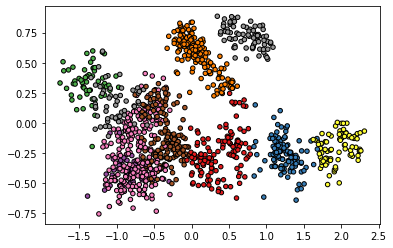

In [4]:
def main():
    #data = pd.read_csv(sys.argv[1])
    data = pd.read_csv('monthly-data-labelled.csv')
    
    X = data.iloc[:, 2:62]
    y = data.iloc[:,0]
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=20)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)


if __name__ == '__main__':
    main()